In [3]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import seaborn as sns; sns.set()

In [ ]:
def diagnostic_plots(lm, x, y):
    fig, ax = plt.subplots(figsize=(15, 5), ncols=3)
    _x = np.arange(min(x), max(x)+0.2, step=0.2)
    ax[0].plot(_x, lm.params[0] + lm.params[1] * _x, color="firebrick")
    ax[0].scatter(x=x, y=y, s=2)
    ax[1].scatter(y=lm.resid, x=lm.fittedvalues, s=2)
    ax[1].set(title="Fitted VS residuals")
    ax[2].hist(lm.resid, density=True)
    # Plot the density function
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, lm.resid.mean(), lm.resid.std())
    ax[2].plot(x, p, linewidth=1.5, color="firebrick")
    ax[2].set(title="residuals")
    plt.tight_layout();

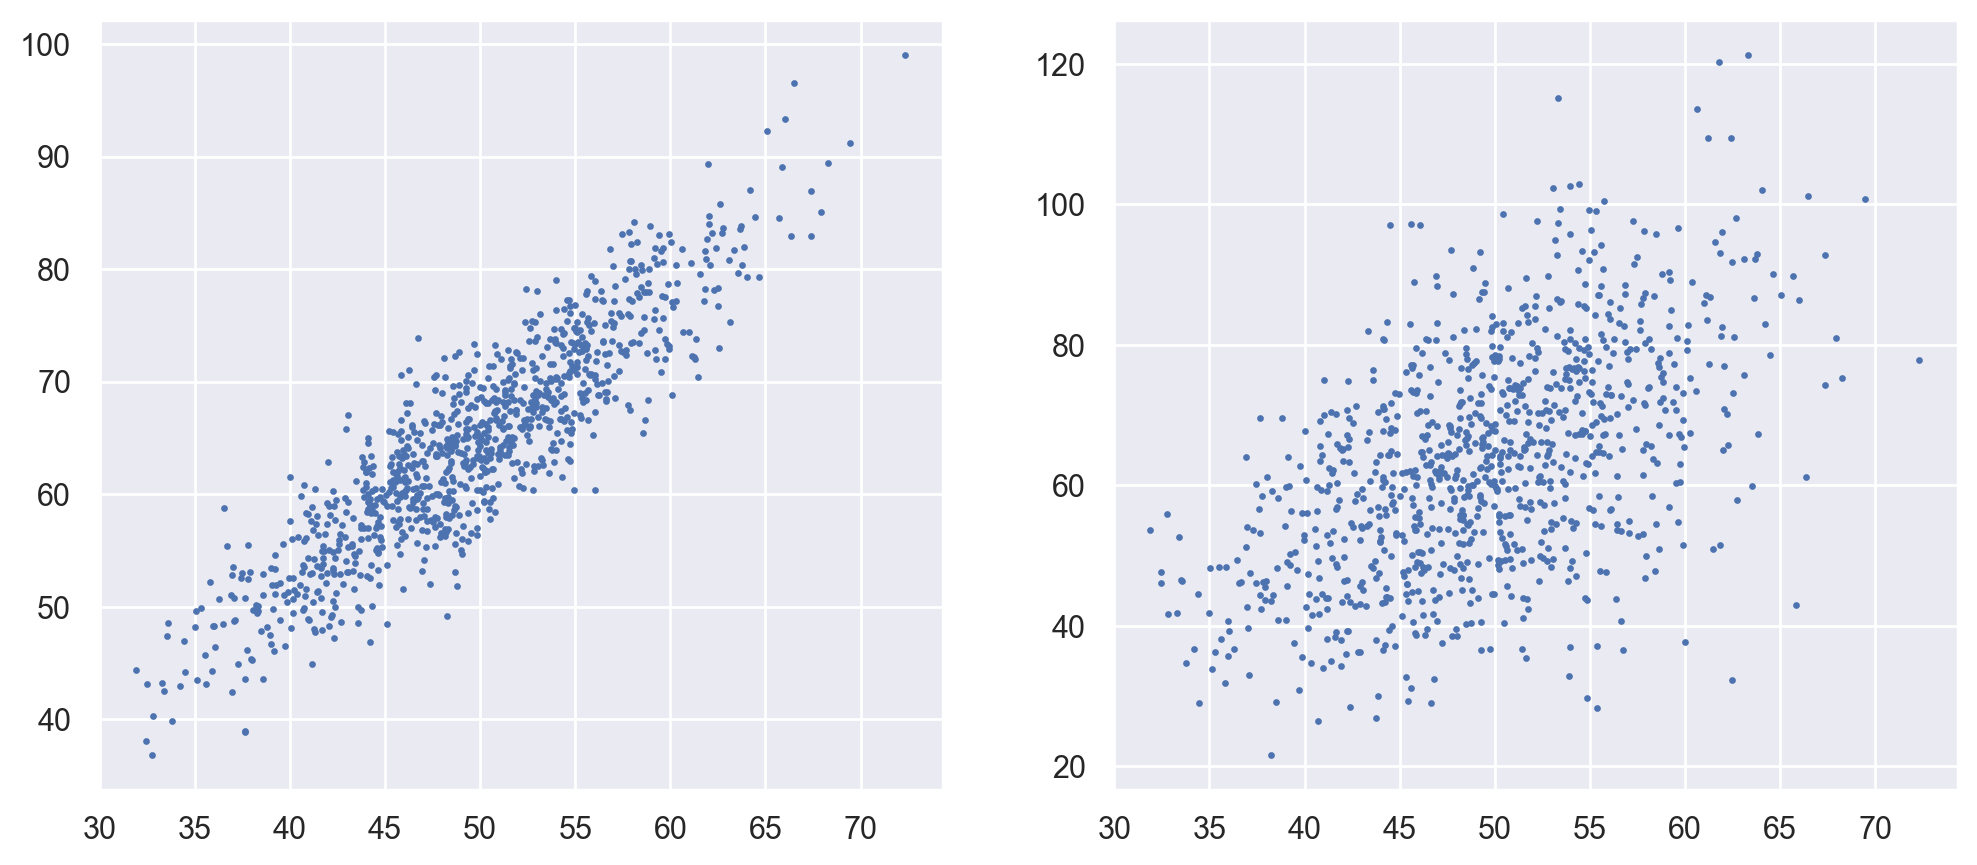

In [149]:
np.random.seed(23)
N = 1_000
x = np.random.normal(size=N, loc=50, scale=7)
beta_true = 1.3
sigma_true = 4
eps = np.random.normal(size=N, scale=sigma_true)
eps_hetero = np.random.normal(scale=sigma_true*x)/15

y_linear=x*beta_true + eps
y_hetero=x*beta_true + eps_hetero

fig, ax=plt.subplots(figsize=(12, 5), ncols=2)

ax[0].scatter(x, y_linear, s=2)
ax[1].scatter(x, y_hetero, s=2);

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     4325.
Date:                Mon, 11 Mar 2024   Prob (F-statistic):               0.00
Time:                        21:55:26   Log-Likelihood:                -2831.5
No. Observations:                1000   AIC:                             5667.
Df Residuals:                     998   BIC:                             5677.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4660      0.966      1.518      0.1

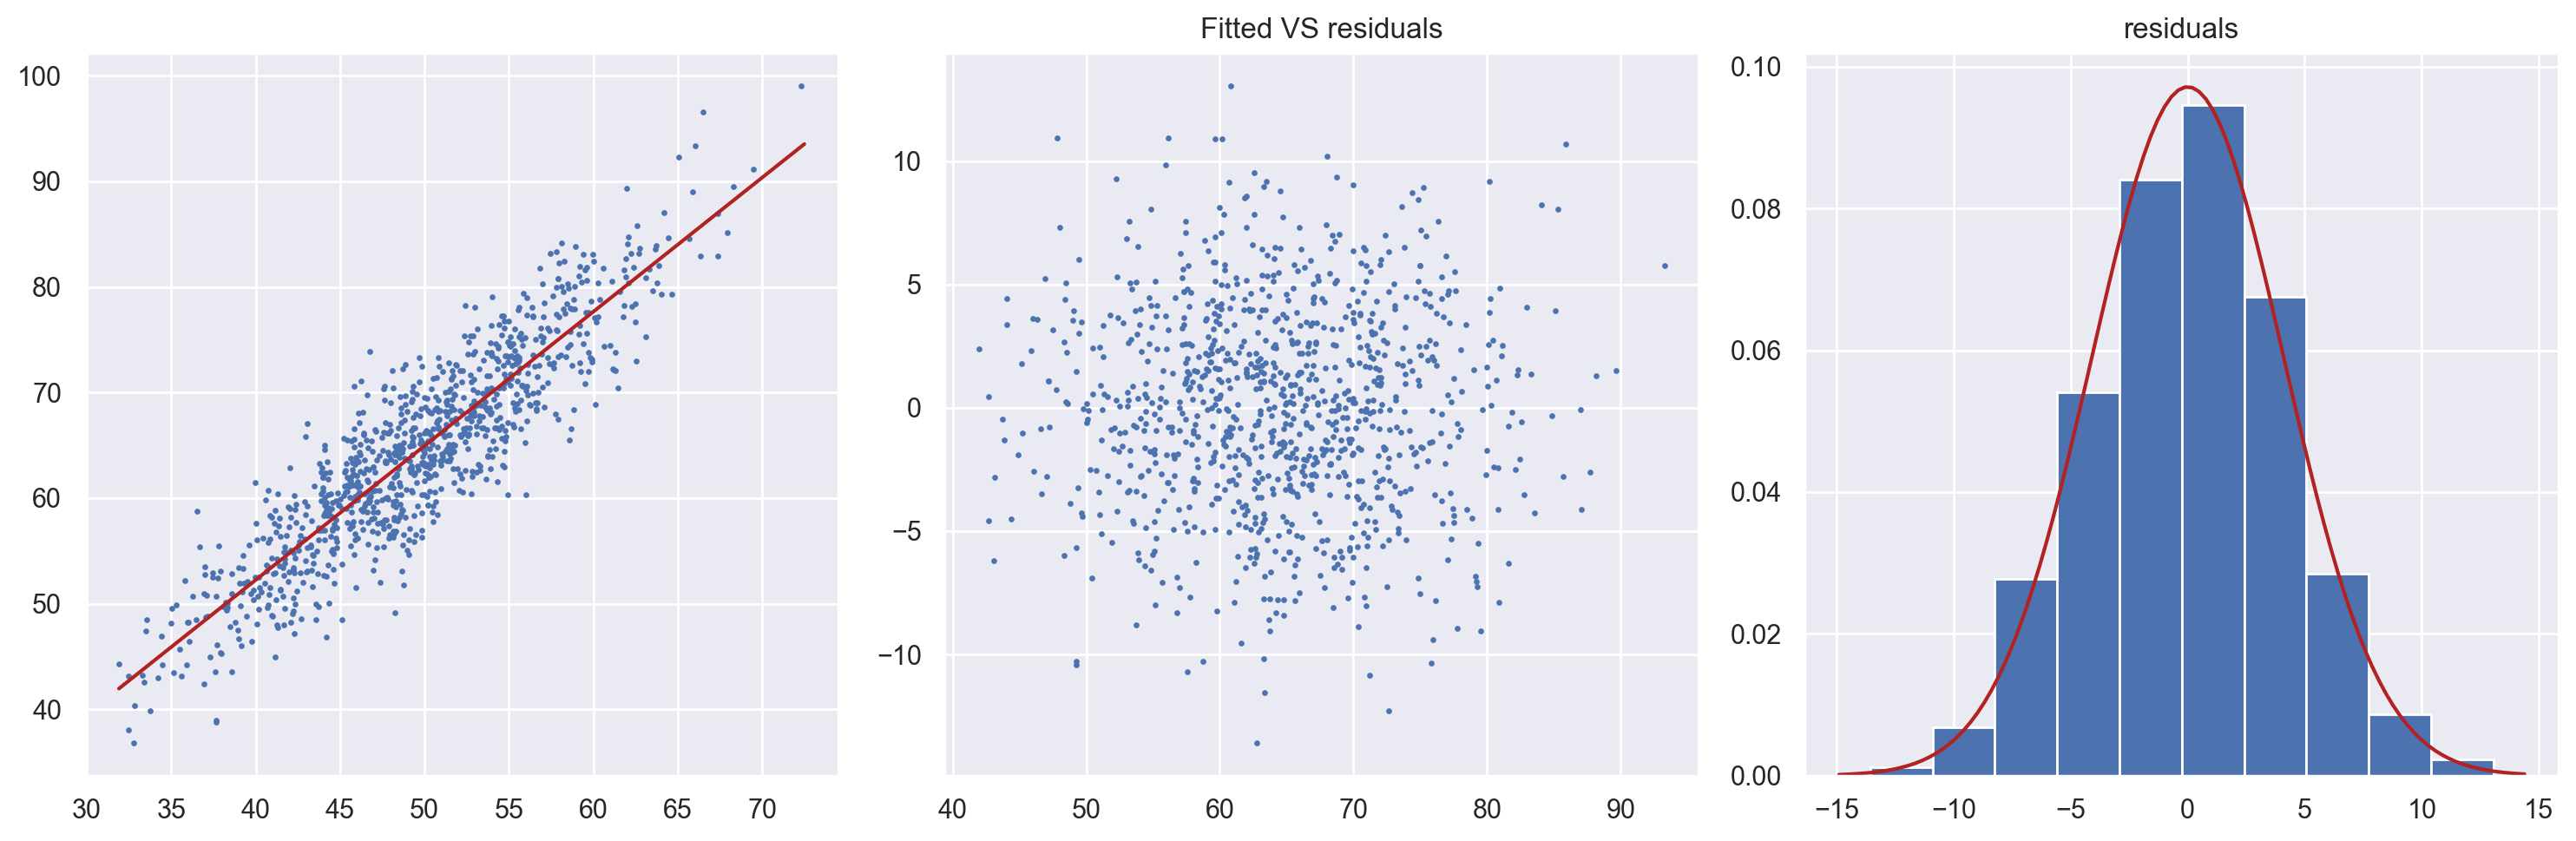

In [147]:
lm1 = sm.OLS(exog=sm.add_constant(x), endog=y_linear).fit()
print(lm1.summary())
diagnostic_plots(lm=lm1, x=x, y=y_linear)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     385.0
Date:                Mon, 11 Mar 2024   Prob (F-statistic):           9.55e-73
Time:                        21:55:27   Log-Likelihood:                -4025.6
No. Observations:                1000   AIC:                             8055.
Df Residuals:                     998   BIC:                             8065.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6044      3.188      0.503      0.6

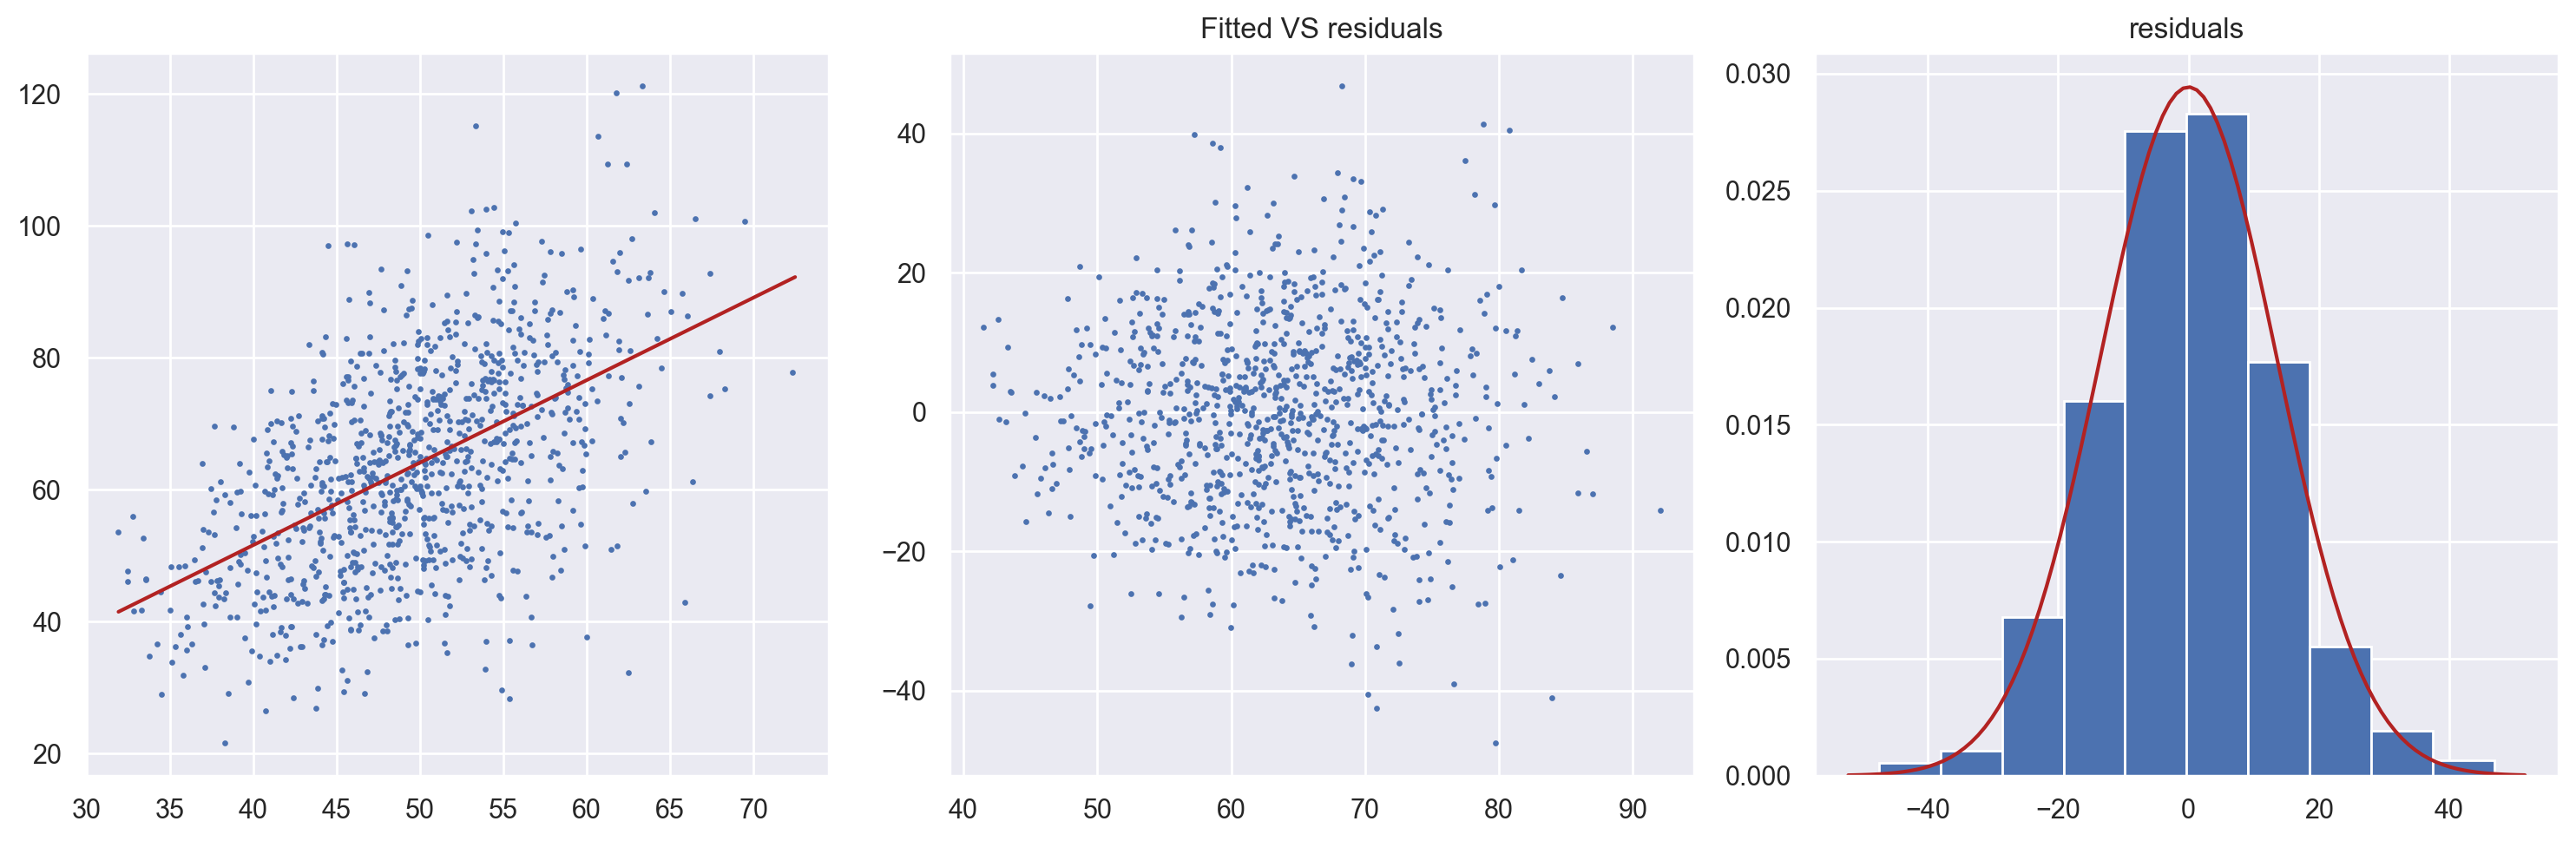

In [148]:
lm2 = sm.OLS(exog=sm.add_constant(x), endog=y_hetero).fit()
print(lm2.summary())
diagnostic_plots(lm=lm2, x=x, y=y_hetero)